In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage as ndi
from skimage import feature
from skimage import color
from skimage import io

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
from skimage.filters import threshold_otsu

#fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,12),
                                   #sharex=True, sharey=True)

im = color.rgb2gray(io.imread(r'C:\Users\Júlio\Documents\GitHub\image-analysis\images\seqa.png'))
print(im.shape)
im[:,0:408] = np.zeros((4950,408))
im = im[:,148:628]

thresh = threshold_otsu(im)
binary = im > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 14))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1, adjustable='box-forced')
ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0], adjustable='box-forced')

ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Thresholded')
ax[1].axis('off')

ax[2].imshow(new_imm, cmap=plt.cm.gray)
ax[2].set_title('Interface')
ax[2].axis('off')

plt.show()

D = {n: [i for i, j in enumerate(k) if j] for n, k in enumerate(binary)}

new_imm = np.zeros(im.shape)
for k,v in D.items():
    if v != []:
        new_imm[k,np.floor(np.mean(v))-8:np.floor(np.mean(v))] = 1
    else:
        new_imm[k,:] = new_imm[k-1,:]
figs, axs = plt.subplots(ncols=1, figsize=(12, 8))
axs.imshow(new_imm, cmap=plt.cm.gray)
axs.axis('off')
plt.show()

In [ ]:
aa = []
for v in D.values():
    if v == []:
        aa.append(aa[-1])
    else:
        aa.append(np.mean(v))
aa = np.array(aa)
fig,ax = plt.subplots(ncols=1,figsize=(16,4))
ax.plot(480 - np.flipud(aa))
ax.set_ylim([0,480])
ax.set_ylabel('Thickness (mm)')
ax.set_xlabel('Distance (mm)')

i = 1
im = color.rgb2gray(io.imread(r'D:\JulioFerreira\Mestrado\Imagens\Alta\30\253\Imagem (%d).jpg' %i))
im[:,0:41] = np.zeros((792,41))
im = im[:,7:69]
plt.figure(figsize=(6,10))
plt.imshow(im,cmap=plt.cm.gray)
plt.axis('off')

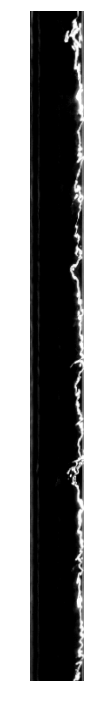

In [2]:
def imread_x(f,path,box=(0,792,0,85)):
    return color.rgb2gray(io.imread(
            r'D:\JulioFerreira\Mestrado\Imagens' + path + 
            '(%d).jpg'%f)[box[0]:box[1],box[2]:box[3]])

def im_start(pic,box,path):
    im_matrix = io.ImageCollection(
        pic,box,path,load_func=imread_x)
    return(im_matrix.concatenate())

def bg_im(im):
    bg = np.zeros(im.shape,dtype=int)
    bg[:,0:np.floor_divide(im.shape[1],2)] = 255
    return(bg)

def bg_removal(im_mat):
    bg = bg_im(im[0])
    im_int = im_mat * 255
    im_int = im_int.astype(int)
    no_bg = im_int - bg
    no_bg[no_bg < 0] = 0
    return(no_bg)

from skimage.filters import threshold_otsu
from skimage import morphology

def im_proc(im):
    th = threshold_otsu(im)
    im_bin = im > th
    return(ndi.binary_fill_holes(
            morphology.binary_remove_small_objects(
                morphology.binary_closing(
                    im_bin,np.ones((3,3))),30)))
    
    
pic = np.linspace(1,9000,9000)
all_images = io.ImageCollection(pic,path=r'\Alta\30\253\Imagem ',
                                box=(0,792,6,68), load_func=imread_x)

plt.figure(figsize=(4,12))
plt.imshow(all_images[100],cmap=plt.cm.gray)
plt.axis('off');

In [ ]:
#all_images = io.concatenate_images(ic)

In [43]:
#all_images[:,:,0:41] = 0
#all_images = all_images[:,:,6:68]

bin_vec = np.ndarray(all_images.shape)
height_vec = np.array(all_images.shape[:2])
for i,img in enumerate(all_images):
    thresh = threshold_otsu(img)
    binary = im > thresh
    bin_vec[i] = binary
    D = {n: [i for i, j in enumerate(k) if j] for n, k in enumerate(binary)}

np.floor(all_images[0]*255)

(792, 62)

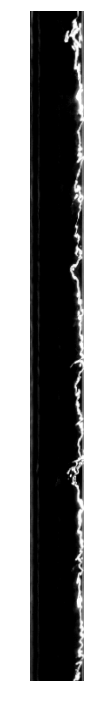

In [288]:
plt.figure(figsize=(4,12))
plt.imshow(all_images[100],cmap=plt.cm.gray)
plt.axis('off')
#plt.subplot(122),plt.imshow(all_images[100,:,6:69],cmap=plt.cm.gray)
#plt.axis('off');
all_images[100].shape

In [3]:
s = np.zeros(all_images[0].shape,dtype=int)
s[:,0:np.floor_divide(all_images[0].shape[1],2)] = 255
#for i in all_images:
#    s += i

(-0.5, 61.5, 791.5, -0.5)

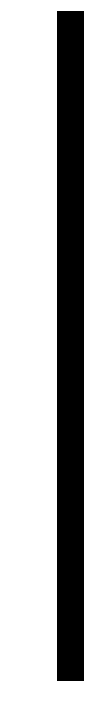

In [172]:
#s = s/9000
plt.figure(figsize=(4,12))
plt.imshow(s,cmap=plt.cm.gray)
plt.axis('off')

In [11]:
a, ss = np.floor(all_images[2568]*255), np.fliplr(np.floor(s*255))
#plt.figure(figsize=(6,12))
#plt.subplot(151),plt.imshow(a,cmap=plt.cm.gray)
#plt.axis('off')
#plt.subplot(152),plt.imshow(s,cmap=plt.cm.gray)
#plt.axis('off')
#plt.subplot(153),plt.imshow(s-a,cmap=plt.cm.gray)
#plt.axis('off')
#plt.subplot(154),plt.imshow(a-s,cmap=plt.cm.gray)
#plt.axis('off')
#plt.subplot(155),plt.imshow(a-(s-a),cmap=plt.cm.gray)
#plt.axis('off')

(-0.5, 61.5, 791.5, -0.5)

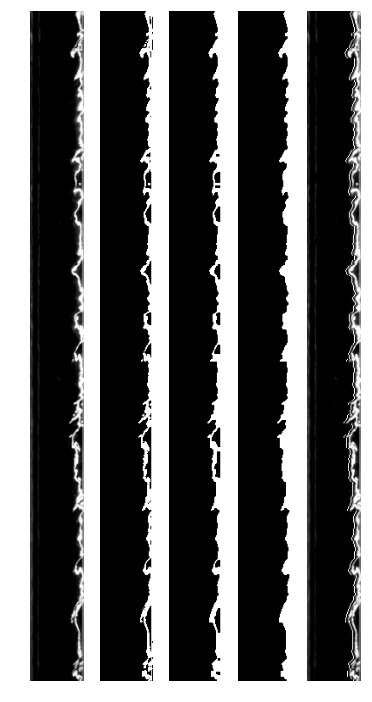

In [13]:
from skimage.filters import threshold_otsu
from skimage import morphology

b = a-s
b[b<0]=0
thresh = threshold_otsu(b)
binary = b > thresh

plt.figure(figsize=(6,12))
plt.subplot(151),plt.imshow(a,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152),plt.imshow(binary,cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153),plt.imshow(morphology.closing(
        binary,np.ones((3,3))),cmap=plt.cm.gray)
plt.axis('off')
#plt.subplot(164),plt.imshow(morphology.remove_small_objects(morphology.closing(binary,np.ones((3,3))),30),
                            #cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154),plt.imshow(ndi.binary_fill_holes(
        morphology.closing(binary,np.ones((3,3)))),
                            cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155),plt.imshow(cc,cmap=plt.cm.gray)
plt.axis('off')

C:\Users\Júlio\Anaconda3\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


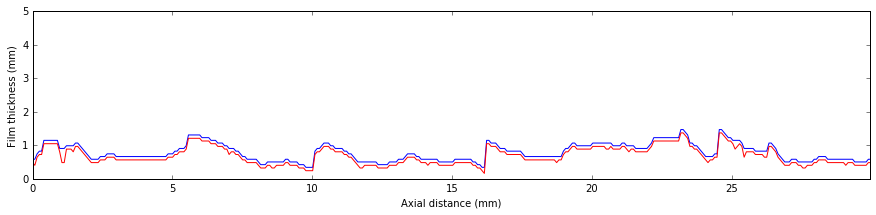

In [7]:
xx = ndi.binary_fill_holes(morphology.remove_small_objects(morphology.closing(binary,np.ones((3,3))),30))
D = {n: np.array([i for i, j in enumerate(k) if j]) for n, k in enumerate(xx)}
height = 5-np.array([np.amin(i) for i in list(D.values())])*5/62
D2 = {n: np.array([i for i, j in enumerate(k) if j]) for n, k in enumerate(binary)}
height2 = 5-np.array([np.amin(i) for i in list(D2.values())])*5/62

plt.figure(figsize=(15,3))
plt.plot(np.linspace(0,792,792)*5/62,np.flipud(height)+0.1)
plt.plot(np.linspace(0,792,792)*5/62,np.flipud(height2),'r')
plt.ylabel('Film thickness (mm)')
plt.xlabel('Axial distance (mm)')
plt.axis([0,371*5/62,0.0,5.0]);

(-0.5, 61.5, 791.5, -0.5)

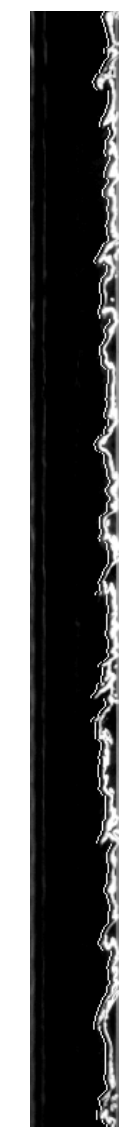

In [8]:
cc = a[:,:]
for i,j in enumerate(cc):
    j[min(D[i])-3] = 255
    #b.append(j)
#b = np.array(b).reshape((792,62))
plt.figure(figsize=(10,20))
plt.subplot(131),plt.imshow(cc,cmap=plt.cm.gray)
plt.axis('off')

In [110]:
cc is a

False

In [3]:
import time

start_time = time.clock()
arar = all_images.concatenate()
print(time.clock() - start_time, "seconds")
arar.shape

115.09067290957945 seconds


(9000, 792, 62)

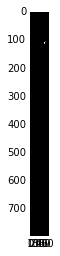

In [33]:
plt.imshow(morphology.remove_small_objects(morphology.closing(binary,np.ones((3,3))),30)^
           morphology.closing(binary,np.ones((3,3))),cmap=plt.cm.gray)

In [16]:
#D

{0: array([54, 55, 56, 57, 58, 59, 60, 61]),
 1: array([54, 55, 56, 57, 58, 59, 60, 61]),
 2: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
 3: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
 4: array([52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 5: array([52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 6: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
 7: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
 8: array([53, 54, 55, 56, 57, 58, 59, 60, 61]),
 9: array([54, 55, 56, 57, 58, 59, 60, 61]),
 10: array([54, 55, 56, 57, 58, 59, 60, 61]),
 11: array([54, 55, 56, 57, 58, 59, 60, 61]),
 12: array([55, 56, 57, 58, 59, 60, 61]),
 13: array([55, 56, 57, 58, 59, 60, 61]),
 14: array([55, 56, 57, 58, 59, 60, 61]),
 15: array([55, 56, 57, 58, 59, 60, 61]),
 16: array([56, 57, 58, 59, 60, 61]),
 17: array([56, 57, 58, 59, 60, 61]),
 18: array([56, 57, 58, 59, 60, 61]),
 19: array([56, 57, 58, 59, 60, 61]),
 20: array([57, 58, 59, 60, 61]),
 21: array([57, 58, 59, 60, 61]),
 22: array([57, 58, 59, 60, 61]),
